In [2]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#imports
from __future__ import division
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
pwd

'/tf/notebooks/EDA'

In [5]:
descr = pd.read_csv('../data/QA/full_descr.txt', sep="|")
descr[:15]

,speech_id,date,char_count,word_count,speakerid,party,Congress,Ethnicity,Age,Age_lt_med,NonWhite,Female
0,970000005,19810105,201,34,97105301.0,R,97.0,W,63.0,0.0,0.0,0.0
1,970000006,19810105,202,34,97105071.0,D,97.0,W,56.0,0.0,0.0,0.0
2,970000007,19810105,201,34,97106761.0,D,97.0,W,70.0,0.0,0.0,0.0
3,970000008,19810105,201,34,97106981.0,R,97.0,W,69.0,0.0,0.0,0.0
4,970000010,19810105,49,9,97104811.0,R,97.0,W,57.0,0.0,0.0,0.0
5,970000012,19810105,111,17,97104811.0,R,97.0,W,57.0,0.0,0.0,0.0
6,970000013,19810105,100,18,97107681.0,D,97.0,W,68.0,0.0,0.0,0.0
7,970000015,19810105,2591,358,97104811.0,R,97.0,W,57.0,0.0,0.0,0.0
8,970000016,19810105,105,17,97104811.0,R,97.0,W,57.0,0.0,0.0,0.0
9,970000019,19810105,1426,250,97104811.0,R,97.0,W,57.0,0.0,0.0,0.0


In [6]:
descr.shape

(2585807, 12)

In [7]:
descr['NonWhite'].sum()

207997.0

In [8]:
descr['Female'].sum()

200045.0

In [9]:
descr['Age_lt_med'].sum()

866718.0

In [23]:
descr.word_count.min(), np.percentile(descr.word_count, 10), descr.word_count.mean(), descr.word_count.median(), descr.word_count.max(), np.percentile(descr.word_count, 99)

(1, 7.0, 218.46652669746814, 43.0, 22613, 2049.0)

In [24]:
for p in range(1,100):
    print(p, np.percentile(descr.word_count, p))

1 2.0
2 4.0
3 4.0
4 5.0
5 6.0
6 6.0
7 6.0
8 6.0
9 7.0
10 7.0
11 7.0
12 8.0
13 8.0
14 9.0
15 9.0
16 9.0
17 10.0
18 10.0
19 11.0
20 11.0
21 12.0
22 12.0
23 12.0
24 13.0
25 14.0
26 14.0
27 15.0
28 15.0
29 15.0
30 16.0
31 16.0
32 17.0
33 18.0
34 19.0
35 19.0
36 20.0
37 21.0
38 22.0
39 23.0
40 25.0
41 26.0
42 27.0
43 29.0
44 30.0
45 32.0
46 33.0
47 35.0
48 38.0
49 40.0
50 43.0
51 45.0
52 49.0
53 52.0
54 56.0
55 61.0
56 66.0
57 71.0
58 77.0
59 84.0
60 91.0
61 99.0
62 108.0
63 117.0
64 127.0
65 137.0
66 147.0
67 157.0
68 166.0
69 176.0
70 185.0
71 195.0
72 206.0
73 217.0
74 230.0
75 243.0
76 258.0
77 274.0
78 291.0
79 309.0
80 327.0
81 346.0
82 366.0
83 388.0
84 411.0
85 437.0
86 464.0
87 495.0
88 529.0
89 566.0
90 608.0
91 655.0
92 708.0
93 767.0
94 839.0
95 929.0
96 1052.0
97 1232.0
98 1507.0
99 2049.0


In [18]:
word_count = np.clip(descr.word_count, np.min(descr.word_count), np.percentile(descr.word_count, 99))

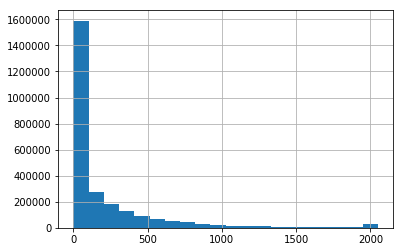

In [20]:
word_count.hist(bins=20)

speakermap.state.value_counts().plot.bar()

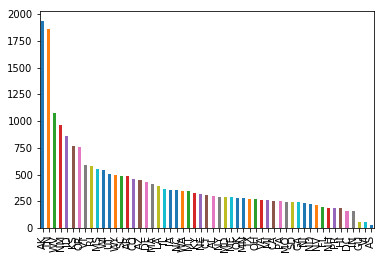

In [75]:
x = speakermap.state.value_counts()/speakermap_unique.state.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

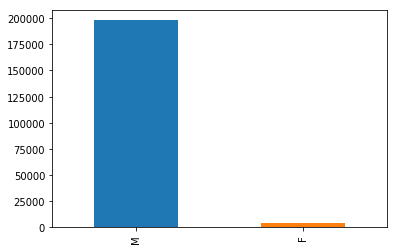

In [55]:
descr.gender.value_counts().plot.bar()

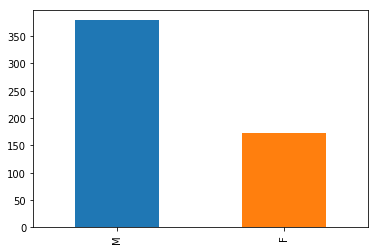

In [76]:
x = descr.gender.value_counts()/descr_unique.gender.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()

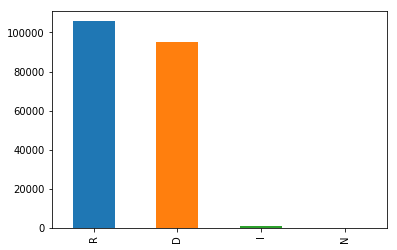

In [51]:
speakermap.party.value_counts().plot.bar()

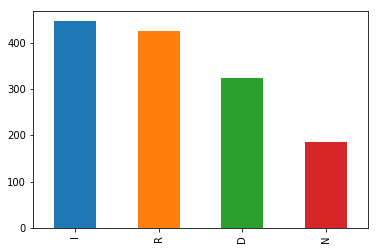

In [78]:
x = speakermap.party.value_counts()/speakermap_unique.party.value_counts()
y = x.sort_values(ascending=False)
y.plot.bar()